# Template Notebook for DS Project
Short description of the project

**Contents:**

* [Step 0: Notes regarding this notebook](#step0)
* [Step 1: Understand the problem and define the project](#step1)
* [Step 2: Data acquisition](#step2)
* [Step 3: Exploratory data analysis - clean and understand data](#step3)
* [Step 4: Enrich data set with additional data ](#step4)
* [Step 5: Build helpful visualizations for communication](#step5)
* [Step 6: Get predictive - machine learning](#step6)
* [Step 7: Iterate and maintain](#step7)


## Step 0: Notes regarding this notebook <a id='step0'></a>
This notebook serves as a guideline for a standard data science workflow and contains tips and code snippets to increase efficiency when working on data science projects in Python/jupyter notebooks.

Obviously every project is different and this notebook just serves as a general help and guideline. It is work in [progress](https://github.com/jstehr91/ds-template-notebook). 

### Jupyter Notebook [tips and tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
**Command mode:** Navigate around notebook
* `A`: insert a new cell above the current cell
* `B`: insert a new cell below the current cell
* `M`: change the current cell to Markdown
* `Y`: change the current cell to code
* `D (2X)`: delete cell
* `Shift + M`: merge multiple selected cells

**Edit mode:** Edit individual cells
* `Ctrl + Shift + -`: split the current cell where cursor is
* `Shift + Tab`: shows docstring documentation of current object
* `Ctrl + Shift + -`: split the current cell where cursor is

**See all shortcuts:** `H` in command mode 

### Define functions - best practices
What we should keep in mind when defining functions:

* **Don't repeat yourself** (DRY): whenever we reuse code snippets multiple times, think about creating a function for them
* **Do one thing** (DOT): if possible split your functions so that they do only one thing and can be reused in many cases (`load_and_plot()` is not as variable as `load_data()` and a separate `plot_graph()` function)
* **Document**: write a docstring to describe the function

Example:

In [ ]:
def function(arg_1, arg_2=42):
    """Description of what the function does.

    Args:
      arg_1 (str): Description of arg_1 that can break onto the next line
        if needed.
      arg_2 (int, optional): Write optional when an argument has a default
        value.

    Returns:
      bool: Optional description of the return value
      Extra lines are not indented.

    Raises:
      ValueError: Include any error types that the function intentionally
        raises.

    Notes:
      See <link> for more info.  
    """

## Step 1: Understand the problem and define the project <a id='step1'></a>
### Understand the problem
* Predict housing prices in Ames, Iowa (USA) based on various data points
* Why do we want to do that?
    * we want to get a better understanding of ehat drives housing prices
    * because we want to build a website, that guesses correct prices

### Define the project
* understand the data
* build a machine learning model to predict house prices
* what could drive housing prices?

### Load necessary modules and packages

In [1]:
# import usual libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
%matplotlib inline

# profiling
import pandas_profiling as pp

# dates and times and time zones and timestamps
import datetime as dt
import time
import pytz

# create UUIDs
import uuid

# set aesthetic parameters
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# show installed versions
pd.show_versions()

### Helpful cheat-sheets
- Pandas: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- SQL: https://cdn.sqltutorial.org/wp-content/uploads/2016/04/SQL-cheat-sheet.pdf
- Scikit-Learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Or see in GitHub repository (folder `/cheat_sheets/`).

## Step 2: Data acquisition <a id='step2'></a>
### Datasources
Describe the different data sources

**Possible sources:**
* Internal data bases
* Available APIs from used services
* Publicly available data sets
* Requests to capture certain data

**Load helpful libraries**

In [3]:
# Read local files
train = pd.read_csv('data/train.csv') # most read_xyz methods can let you choose the separator and the header row

## Step 3: Exploratory data analysis - clean and understand data <a id='step3'></a>
- Inspect your data sets and figure out how you can combine them
- Identify outliers, missing values, or human error
- Ask questions to the specialist to understand all variables and relationships
- Extract important variables and leave behind useless variables
- Form first hypotheses
- Clean your data: Make it homogenous, take care of missing data, remove duplicates in rows or columns, reclassify discrete variables if values are similar
- Handle privacy data (tag them and make sure you're compliant)

**Helpful resource:** [Data School YT Tutorials](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y) (watch in 2x speed)

### Helpful methods for adjusting pandas DataFrames

In [ ]:
# adjusting columns
df = df.rename({'col one':'col_one', 'col two':'col_two'}, axis='columns') # rename some specific columns
df.columns = ['col_one', 'col_two'] # rename all columns
df.columns = df.columns.str.replace(' ', '_') # format all columns
df.add_prefix('X_') # add prefix to all columns (same for suffix)
df.loc[:, ::-1] # reverse column order

# adjusting rows
df.loc[::-1] # reverse row order
df.reset_index(drop=True) # reset index and drop old one

# dropping columns and rows
df.drop(['Names'], axis=1, inplace=True) # drops columns (axis=1) inplace
df.isna().sum() # see number of missing values per column; .mean() gives percentage
df.dropna(thresh=len(df)*0.9, axis='columns') # dropping columns with more than 10% missing values

# sort series or data frame
df.sort_values(['col1', 'col2'], ascending=True) # sort data frame according to multiple columns

# access certain cells in a data frame


### Helpful methods for first insights

In [ ]:
df.shape() # show no. of rows and columns
df.info() # show columns
df.head/sample/tail() # show sample columns
df.columns # show columns of data set
df.nunique(axis=0) # shows no. of unique values per column
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) # summarizes the count, mean, standard deviation, min, and max for numeric variables (following code formats data for better reading)

# forming ProfileReport and save as output.html file 
profile = pp.ProfileReport(df) 
profile.to_file("output.html")

### Helpful methods for cleaning data

In [ ]:
# Reclassify: if row.column in value_list return value -> apply to column
df.drop([columns], axis=1) # drop (duplicated) columns

#Drop columns with more than x % NA values:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): # only select variables that pass the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

df[df[column] >/</==/.between(low, high)] # remove outliers: 
df.dropna(axis=0) # remove rows with Null values

# convert continuous values into categorical values
pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult']).head(10)

### Helpful methods on finding relationships between attributes

In [ ]:
# print correlation heatmap:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

# scatterplot to display relationship of two variables:
df.plot(kind='scatter', x=col1, y=col2)

# combine histogram per attribute and scatterplot for all relationships:
sns.pairplot(df)

# explore a single variable: 
df[col].plot(kind='hist', bins=123) #histogram
df.boxplot(col) # boxplot

### Helpful templates for data visualization

### Start the data exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### decide which features to use

In [13]:
# print correlation heatmap:
corr = train.select_dtypes(include=['int', 'float']).corr()

<AxesSubplot:>

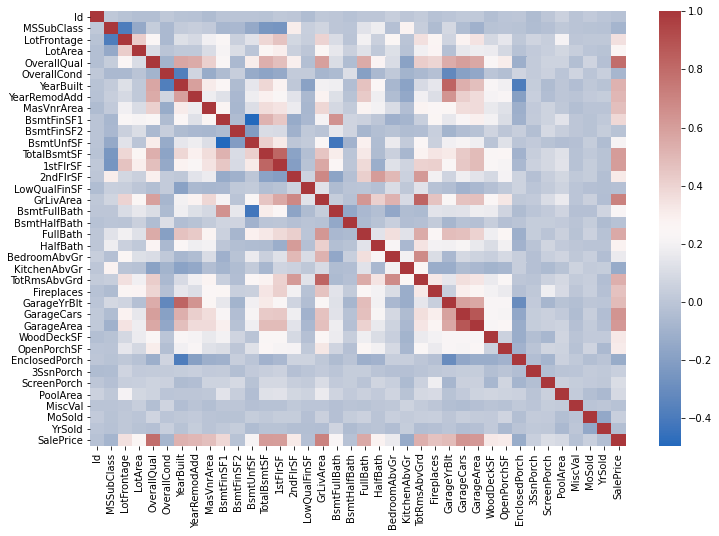

In [17]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap="vlag")

In [18]:
# drop columns with lots of missing values
# check which columns have more that 20% missing values
missing_vals = train.isnull().sum()/train.shape[0]

# filter series for columns with missing values > 20%
drop_columns = train[missing_vals[missing_vals>.2].index]
drop_columns.columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [20]:
train.drop(drop_columns.columns,axis=1,inplace=True)

In [31]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [25]:
X = train.drop("SalePrice",axis=1)
y = train["SalePrice"]

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:

    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])


MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2


ValueError: y contains previously unseen labels: 'RRNn'

## Step 4: Enrich data set with additional data <a id='step4'></a>
- Get most value out of the data set by combining data, clean time-based attributes
- Analyze relationships between the variables
- Try to not reinforce bias

## Step 5: Build helpful visualizations for communication <a id='step5'></a>
- Visualization is the best way to explore and communicate your findings
- Effective way to quickly communicate a lot of information in a short period of time
- Make the visualizations interactive and intuitive

### Summary: Storytelling with Data (Cole Nussbaumer Knaflic)
Why is it important: The amount of data and the need for data driven decisions is ever growing. When presenting data, you want to bring a point across, not the data. And even more importantly, this step is probably the only thing the audience sees of the whole data analysis/science process.

#### Lessons
1. Understand the context
2. Choose am appropriate visual display
3. Eliminate clutter
4. Focus attention where you want it
5. Think like a designer
6. Tell a story

#### Context
- be sure to present explanatory data, not merely exploratory
- who is the recipient? Narrow down, maybe create different communications to different groups. How do they see me?
- what do I want them to know or do? Info only, next steps, start discussing? Slides being presented or a document being read? Which tone should you use?
- how can I use data to make my point? 
- advice: write the 3 minute story and the big idea (one sentence)
- advice: start with low tech - pen and paper

#### Visuals
Verbal system:
- simple text: sometimes less is more - just give the number if there are only one or two
- tables: great if different stakeholders need to check their respective data; use minimal borders
- heatmap: color coding as visual aid to table

Visual system:
- scatter plot: shows relationship between things
- line: plot continuous data
- slope graph: comparing two states and giving visual increase or decrease
- bar charts: good for comparing categorical data, always have 0 point in y axis
- waterfall: good in breaking down subcategories of data or showing changes in time
- horizontal bar chart: even easier to read!
- area chart: good to describe order of magnitude

Avoid:
- pie and donut charts: hard to read and compare, only good to indicate share of 100%
- 3D: skewed, full of distraction
- secondary y axis: might be helpful, but needs time to read - alternatives are direct data labels for secondary dimension out pull apart to two graphs

**Advice**: find out what's easiest to digest. Hand visuals to colleague or friend and let them describe their focus and their observations and questions

#### Avoid clutter
- keep it simple and reduce cognitive load
- how do people perceive order in visuals? Gestalt principles of visual perception help to identify superfluous elements

Gestalt principles:
1. **Proximity**: grouping elements to clusters, rows or columns
2. **Similarity**: through color, size, shape or orientation
3. **Enclosure**: background shading or boxes
4. **Closure**: if a structure is known, we don't need extra borders
5. **Continuity**: our brain already assumes a lot, so we don't need to explicitly show everything
6. **Connection**: lined connections are usually stronger than other similarities

Formatting tips: 

- use left alignment to create clean lines
- use the "z" shape reading pattern
- avoid diagonal lines
- use white space strategically
- don't use contrast non-strategically

Hint: give a summary metric if it helps (e.g. rank of own business in a comparison)

#### Focus Audience Attention
- we see with our brain (stimulus to eye to brain)
- memory: iconic, short term, long term
- use iconic memory via pre-attentive attributes - our brains are hardwired to quickly pick up differences in our environment
- consequences: direct the focus and create visual hierarchy
- text: bold, color, size, italics, borders...
- graphs: mainly colors, size and position
- attention: in exploratory analysis, emphasis might be distracting, in explanatory, it's very helpful to convey information (not only data)
- use all attributes deliberately (size, color, position)
- color: grey vs. one color (think of colorblind, red and green - vischek, colororacle, checkmycolors)
- test of focus: look away from visual and then bank again - where do you land?

#### Think like a Designer
- form follows function - what? how?

**Affordances**: obvious how to interact with a design (knob -> turning)
- highlight the important stuff
- eliminate distractions
- create clear hierarchy of information
- sometimes "super categories" help (e.g. low-> high instead of clear values)

**Accessibility**: being usable by people of diverse abilities
- don't overcomplicate
- text is your friend

**Aesthetics**: prettier = easier to use/understand
- be mindful of color, to alignment and white space

**Acceptance**: by intended audience
- change management: articulate benefits, show side by side, seen input on options, get an influential supporter
- ask unbiased person for feedback on changed design

#### Storytelling
- magic of a story: you are able to retell it to someone else
- parts of a story: beginning, middle and end

Setup and problem statement/incident

- what's in it for me? Why is it necessary?
- what is and what could be?

Attempt to resolve the problem

- how to solve the problem? Options
- examples, external content/comparisons
- why is the audience able to do something about it?

Resolution

- call to action
- conflict and tension are integral parts of stories
- two ways to persuade:

    * Intellectually by arguments (on slides?)
    * Emotionally by arousing energy and attention

- make each title the headline of a part of the story
- narrative flow and audience: results first? Build up story? Input needed?
- executive summary beginning and end
- distinction between written and presented stories
- horizontal (executive summary = slide titles) and vertical logic (each side has reinforcing content) should be checked
- make use of repetition
- reverse storyboarding takes the final slides and writes the main points of each down
- fresh perspective for sparring is always helpful

#### Case Studies/Examples
- dark backgrounds: avoid if possible, as attention is redirected to the background; if necessary though, pay attention to color contrasts
- animation: build up the graph for the audience (usually in presentations), while using annotations in the graph that is sent as a document
- logic in order: think about the story you want to tell and arrange graph accordingly or highlight accordingly if you want to tell different stories
- avoiding the spaghetti graph: emphasize one line at a time by highlighting; separate spatially; combined approach (all lines but one highlighted, per category)
- alternatives to pie charts: text only, bar chart, 100% horizontal stacked bar graph, slope graph
- advice: when stuck, think about the audience and what they should take away from the visual

#### Final Thoughts:
How to apply: 
- practice, practice, practice in the appropriate tools
- recognize good and bad visualizations and make mental notes/reflect - imitate experts!
- use paper for first drafts (better ideas and less attachment to the pre-work)
- allow adequate time to storytelling with data (this is what will be presented from the data analysis you conduct - don't lose the value)
- always iterate and seek feedback
- have fun, play around and find your style
- examples: eagereyes.org fiverthirtyeight.com/datalab flowingdata.com thefunctionalart.com helpmeviz.com makeapowerfulpoint.com storytellingwithdata.com wtfviz.com 

Building skills in the organization:
- upskill everyone: bookclub, workshops, makeover monday, feedback loop, viz competitions
- invest in an expert: hire or upskill a professional
- outsource: if not possible in house

## Step 6: Get predictive - machine learning <a id='step6'></a>
- Machine learning algorithms can help you go a step further into getting insights and predicting future trends
- Unsupervised clustering algorithms can build models to uncover trends in the data that were not distinguishable in graphs and stats
- Supervised algorithms can predict future trends
- Once a model is deployed, we need to operationalize it - it should not stay unused on the shelves

### Train/test split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

/Users/jonasstehr/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/jonasstehr/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'parameter': [a, b, c]}

# create the grid search instance
grid = GridSearchCV(model_instance,param_grid,refit=True,verbose=3)
# fit the model via grid search and find the best combination
grid.fit(X_train,y_train)
# show the best parameter combination
grid.best_params_
# predict the target values
grid_predictions = grid.predict(X_test)

### Model evaluation
#### Classification

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

#### Regression

## Step 7: Iterate and maintain <a id='step7'></a>
- Prove the effectiveness of the project as fast as possible to justify the project
- Maintain the model as the input and environment can change over time

## Thanks!